In [5]:
# Data Import for Loan Prediction



import pandas as pd

df = pd.read_csv('loan_dataset.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [6]:
#Identifying Null Values in Loan Dataset

Boolean_Data=df.isnull()
sumofnull = Boolean_Data.sum()

sumofnull

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [7]:
#Analyzing Data Types in Loan Dataset


df.dtypes


Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [8]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,5.001617e+06,49.995400,10.110750,6.342990,11.996020,0.129970
std,28867.657797,2.876394e+06,17.056051,5.996007,3.644942,1.396826,0.336272
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,25000.750000,2.507092e+06,35.000000,5.000000,4.000000,11.000000,0.000000
50%,50000.500000,5.004938e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,75000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,100000.000000,9.999180e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [9]:
#Analyzing Target Variable Distribution

target_counts = df['Risk_Flag'].value_counts()
target_counts

Risk_Flag
0    87003
1    12997
Name: count, dtype: int64

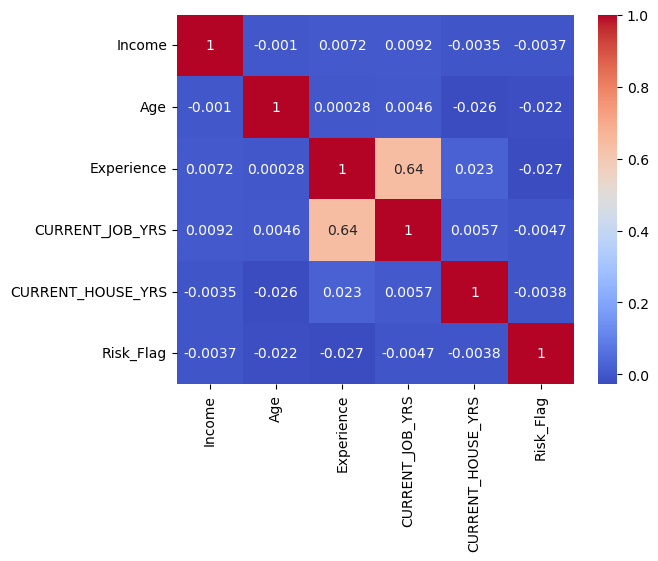

In [10]:
#Visualizing Correlation Among Numeric Features

import matplotlib.pyplot as plt
import seaborn as sns



corr_data = df[['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']].corr()
data_plot=sns.heatmap(corr_data,cmap="coolwarm",annot=True)
plt.show()


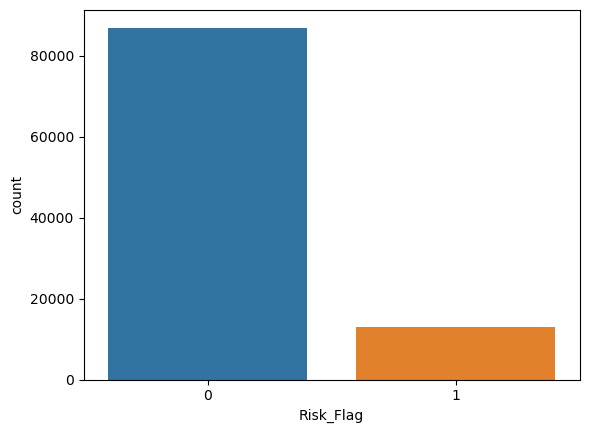

In [11]:
#Visualizing Target Variable Distribution

target_ax = sns.countplot(x='Risk_Flag',data=df)
plt.show()

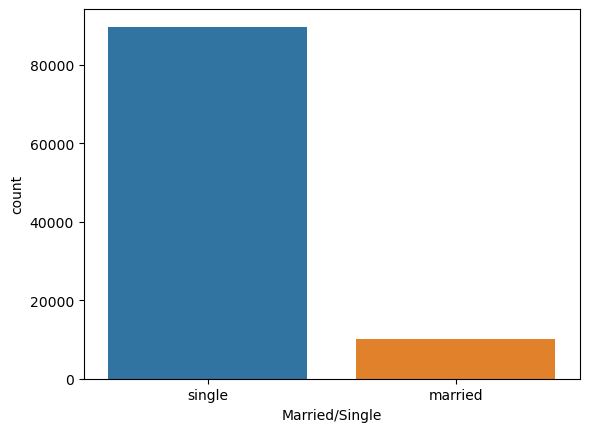

In [12]:
#Visualizing Marital Status Distribution

maritial_ax = sns.countplot(x='Married/Single',data=df)
plt.show()

In [13]:
#Preparing Modified Dataset
#a modified dataset is created by dropping specific columns ('CITY', 'STATE', 'Id') from the original dataset. 
#The modified dataset 'data' serves as a refined version with certain columns removed.
#This data preparation step streamlines the dataset for further analysis, removing unnecessary or redundant columns.

data = df.drop(['CITY','STATE','Id'],axis=1)

In [14]:
#Encoding Categorical Features

from sklearn.preprocessing import LabelEncoder 

le=LabelEncoder()


data['Married/Single'] = le.fit_transform(data['Married/Single'])
data['House_Ownership'] = le.fit_transform(data['House_Ownership'])
data['Car_Ownership']=le.fit_transform(data['Car_Ownership'])
data['Profession']=le.fit_transform(data['Profession'])

   
data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,3,13,0
1,7574516,40,10,1,2,0,43,9,13,0
2,3991815,66,4,0,2,0,47,4,10,0
3,6256451,41,2,1,2,1,43,2,12,1
4,5768871,47,11,1,2,0,11,3,14,1


In [15]:
#the MinMaxScaler from the sklearn library is utilized to normalize the dataset's numerical features. 
#The MinMaxScaler scales numerical features to a specified range (commonly between 0 and 1), ensuring consistency
#in the scale of features.

from sklearn.preprocessing import MinMaxScaler

Scaler=MinMaxScaler()
data=Scaler.fit_transform(data)

data = pd.DataFrame(data,columns=['Income','Age','Experience','Married/Single','House_Ownership','Car_Ownership','Profession','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag'])


data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,0.129497,0.034483,0.15,1.0,1.0,0.0,0.66,0.214286,0.75,0.0
1,0.757263,0.327586,0.50,1.0,1.0,0.0,0.86,0.642857,0.75,0.0
2,0.398594,0.775862,0.20,0.0,1.0,0.0,0.94,0.285714,0.00,0.0
3,0.625310,0.344828,0.10,1.0,1.0,1.0,0.86,0.142857,0.50,1.0
4,0.576498,0.448276,0.55,1.0,1.0,0.0,0.22,0.214286,1.00,1.0


In [16]:
#Data Splitting and Resampling for Model Training
#!pip install scikit-learn==1.2.2

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE



X = data.drop(['Risk_Flag'],axis=1)
y = data[['Risk_Flag']]

oversample = SMOTE()
X_res, y_res = oversample.fit_resample(X, y.values.ravel())



X_train, X_validation, Y_train, Y_validation  = train_test_split(X_res, y_res, test_size=0.2,random_state=4)
Y_train=pd.Series(Y_train)
Y_validation=pd.Series(Y_validation)
#--- Inspect data ---
X_train.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
17510,0.681211,0.551724,0.65,0.0,1.0,0.0,0.06,0.214286,0.25
86912,0.332433,0.534483,0.35,1.0,0.0,0.0,0.12,0.500000,0.00
125597,0.476794,0.431034,0.85,1.0,1.0,0.0,0.00,0.785714,1.00
12836,0.790696,0.775862,0.00,1.0,1.0,0.0,0.96,0.000000,0.00
172489,0.981603,0.086207,0.25,1.0,1.0,0.0,0.14,0.357143,1.00


In [26]:
#Training Logistic Regression Model and Evaluation

#--- Import LogisticRegression ---
from sklearn.linear_model import LogisticRegression
#--- Import accuracy_score, precision_score, recall_score, f1_score from sklearn.metrics ---
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

LR = LogisticRegression()
LR.fit(X_train,Y_train)
y_pred = LR.predict(X_validation)


accuracy = accuracy_score(Y_validation,y_pred)
precision = precision_score(Y_validation, y_pred)
recall = recall_score(Y_validation, y_pred)
f1 = f1_score(Y_validation, y_pred)

#--- Inspect data ---
print("LOGISTIC REGRESSION MODEL")
print("_"*40)
print("Accuracy :",accuracy*100)
print("Precision :",precision*100)
print("Recall :",recall*100)
print("f1-Score:",f1*100)

LOGISTIC REGRESSION MODEL
________________________________________
Accuracy : 55.73530256881788
Precision : 54.941669612645825
Recall : 62.65983181661099
f1-Score: 58.54748002045046


In [25]:
#Training K-Nearest Neighbors (KNN) Classifier and Evaluation

#--- Import KNeighborsClassifier ---
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_validation)

accuracy = accuracy_score(Y_validation,y_pred)
precision = precision_score(Y_validation, y_pred)
recall = recall_score(Y_validation, y_pred)
f1 = f1_score(Y_validation, y_pred)

#--- Inspect data ---
print("K-NEAREST NEIGHBORS (KNN) CLASSIFIER")
print("_"*40)
print("Accuracy :",accuracy*100)
print("Precision :",precision*100)
print("Recall :",recall*100)
print("f1-Score:",f1*100)

K-NEAREST NEIGHBORS (KNN) CLASSIFIER
________________________________________
Accuracy : 95.32498132291248
Precision : 92.92846619741366
Recall : 98.09353761087432
f1-Score: 95.44117235002382


In [27]:
#Training Extra Trees Classifier and Evaluation

#--- Import ExtraTreesClassifier ---
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

classifier=ExtraTreesClassifier()
classifier.fit(X_train,Y_train)

y_pred=classifier.predict(X_validation)


accuracy = accuracy_score(Y_validation,y_pred)
precision = precision_score(Y_validation, y_pred)
recall = recall_score(Y_validation, y_pred)
f1 = f1_score(Y_validation, y_pred)
#--- Inspect data ---
print("EXTRA TREES CLASSIFIER")
print("_"*40)
print("Accuracy :",accuracy*100)
print("Precision :",precision*100)
print("Recall :",recall*100)
print("f1-Score:",f1*100)

EXTRA TREES CLASSIFIER
________________________________________
Accuracy : 96.06344462961899
Precision : 92.75935828877006
Recall : 99.90784471835042
f1-Score: 96.20098718873051


In [36]:
# Model Evaluation with Accuracy, Confusion Matrix, and Classification Report

#--- Import accuracy_score, confusion_matrix, classification_report from sklearn.metrics ---
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



accuracy= accuracy_score(Y_validation,y_pred)

cm= confusion_matrix(Y_validation,y_pred)

cr= classification_report(Y_validation,y_pred)

#--- Inspect data ---
print("Accuracy :",accuracy*100)
print("\n")
print("Confusion Matrix:\n",cm)
print("\n")
print("Classification Report:\n",cr)


Accuracy : 96.06344462961899


Confusion Matrix:
 [[16086  1354]
 [   16 17346]]


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     17440
         1.0       0.93      1.00      0.96     17362

    accuracy                           0.96     34802
   macro avg       0.96      0.96      0.96     34802
weighted avg       0.96      0.96      0.96     34802



In [22]:
#Final Prediction

'''The trained best-performing model-Extra Trees Classifier from previous evaluations is used to predict loan risk for this particular set
of features. This prediction assists in understanding how the chosen model categorizes the given individual's loan 
risk as a binary outcome (1 or 0) based on the provided information.'''

sample_data = pd.DataFrame([[0.576498,0.448276,0.55,1.0,1.0,0.0,0.22,0.214286,1.00]],
                        columns=['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'])

prediction = classifier.predict(sample_data)

#--- Inspect data ---
prediction

array([1.])

In [37]:
# Prediction value 1 indicates that the given Customer is identified as a riskier applicant and can be a
#loan defaulter